   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

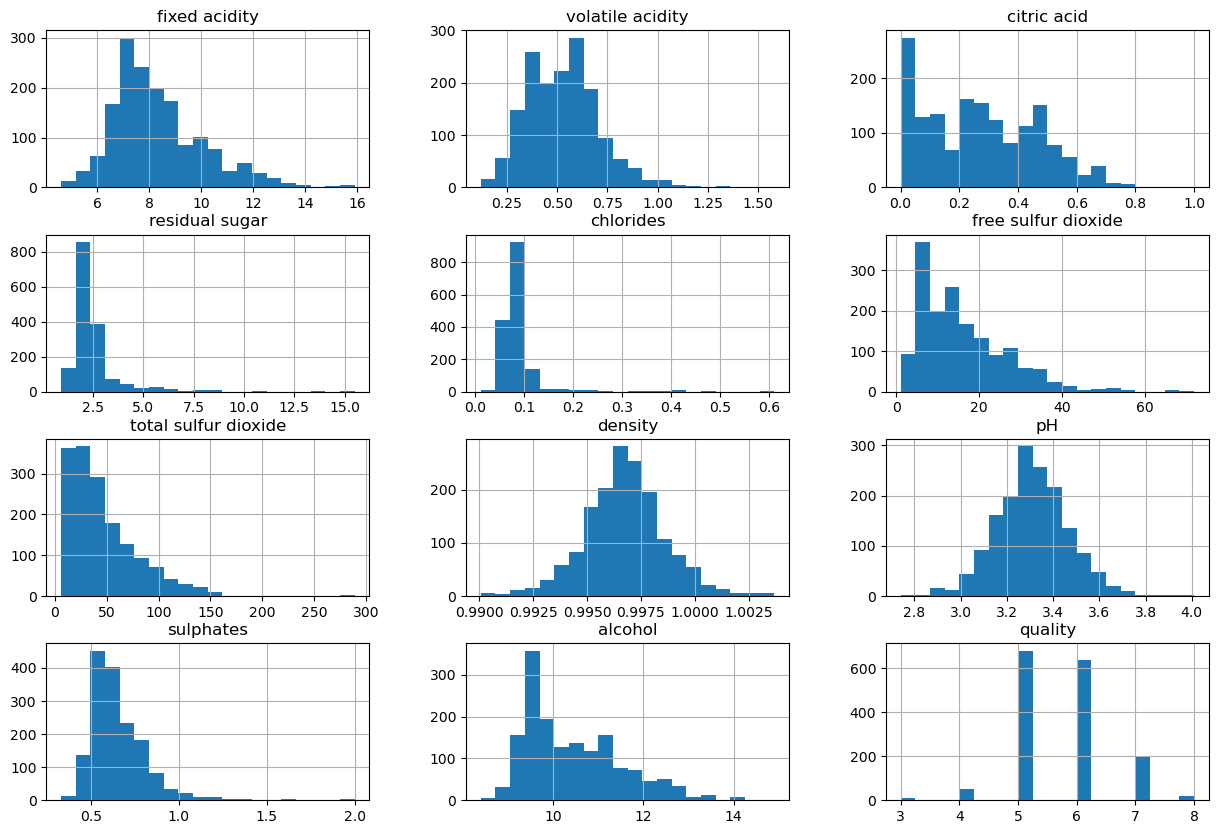

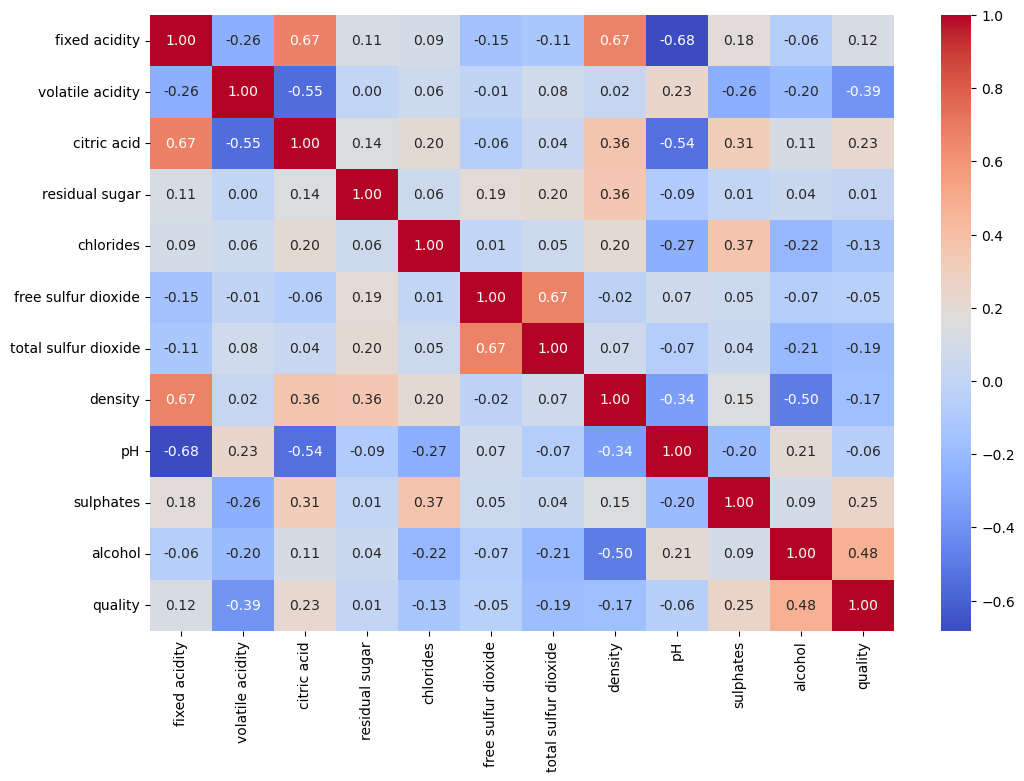

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv("C:\\Users\\Javier Alexander Gar\\Downloads\\Mosquera tareas\\ANÁLISIS DE DATOS\\Tarea 3\\DatasetRedWineQuality\\winequality-red.csv")

# Análisis preliminar
print(df.head())
print(df.info())
print(df.describe())

# Identificar valores nulos
print(df.isnull().sum())

# Visualización de las distribuciones de las variables
df.hist(bins=20, figsize=(15, 10))
plt.show()

# Correlación entre características
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

# Eliminar valores nulos si es necesario
df = df.dropna()

# Escalar las características
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('quality', axis=1))  # Normalizar todas las características menos 'quality'

# Crear DataFrame con las características escaladas
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['quality'] = df['quality']

In [11]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df_scaled.drop('quality', axis=1)
y = df_scaled['quality']

# Selección de las 5 mejores características
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Ver las mejores características
best_features = pd.DataFrame(selector.scores_, index=X.columns, columns=["Score"])
print(best_features.sort_values(by="Score", ascending=False).head(5))

                           Score
alcohol               115.854797
volatile acidity       60.913993
total sulfur dioxide   25.478510
sulphates              22.273376
citric acid            19.690664


In [12]:
from sklearn.model_selection import train_test_split

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Inicializar el modelo
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predicciones
y_pred_tree = tree_model.predict(X_test)

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print("Árbol de Decisión:")
print(f"Precisión: {accuracy_score(y_test, y_pred_tree)}")
print(f"Precisión (Precision): {precision_score(y_test, y_pred_tree, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_tree, average='weighted')}")
print(f"F1-score: {f1_score(y_test, y_pred_tree, average='weighted')}")

Árbol de Decisión:
Precisión: 0.5833333333333334
Precisión (Precision): 0.5896266470377899
Recall: 0.5833333333333334
F1-score: 0.5864050936754572


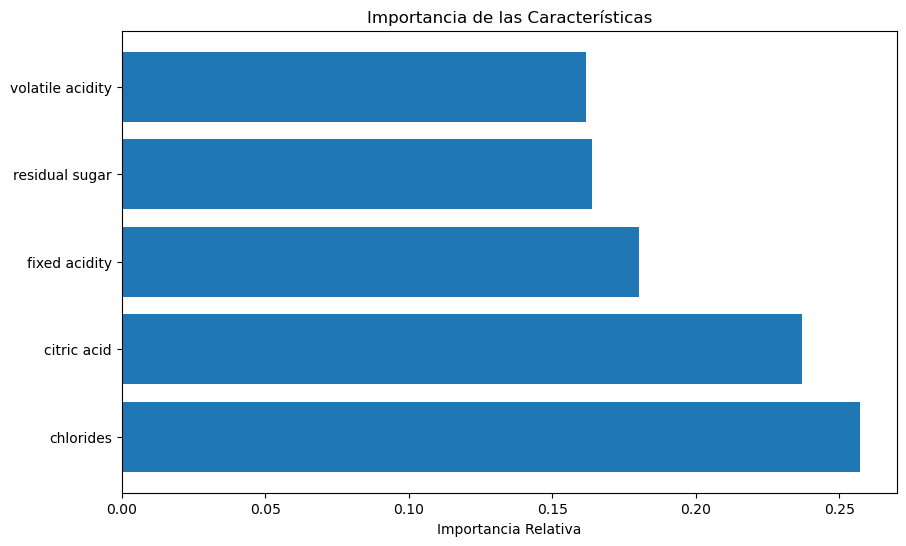

In [15]:
import numpy as np

# Importancia de las características
importances = tree_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Importancia de las Características")
plt.barh(range(X_new.shape[1]), importances[indices], align="center")
plt.yticks(range(X_new.shape[1]), [X.columns[i] for i in indices])
plt.xlabel("Importancia Relativa")
plt.show()

In [16]:
# Modelo de Árbol de Decisión utilizado para predecir la calidad del vino.
# La precisión obtenida fue de 0.58, indicando que el modelo tiene una tasa de aciertos del 58%.
# Las características más relevantes para la predicción de la calidad del vino son:
# 1. Alcohol
# 2. Acidez volátil
# 3. Dióxido de azufre total
# 4. Sulfatos
# 5. Ácido cítrico
# 
# A pesar de un rendimiento moderado, las métricas como precisión, recall y F1-score sugieren que
# el modelo podría mejorarse. Ajustar los parámetros del árbol de decisión o probar otros algoritmos
# podría resultar en un mejor desempeño en la predicción de la calidad del vino.